In [0]:
from keras.datasets import imdb

In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [26]:
max(train_data[0])

7486

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [28]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
import numpy as np

In [0]:
def vec_seq(sequences, dimensions=10000):
  results = np.zeros((len(sequences),dimensions))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results
x_train = vec_seq(train_data)
x_test = vec_seq(test_data)

In [31]:
len(x_train[0])

10000

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
#The model definition
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
#Compiling the model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [0]:
#Configuring the optimizer
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [0]:
#Using custom losses and metrics
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [0]:
#Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [38]:
#Training your model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.5316 - acc: 0.7863 - val_loss: 0.3980 - val_acc: 0.8675
Epoch 2/20
15000/15000 [==============================] - 2s 142us/step - loss: 0.3146 - acc: 0.9002 - val_loss: 0.3336 - val_acc: 0.8625
Epoch 3/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.2294 - acc: 0.9255 - val_loss: 0.2884 - val_acc: 0.8854
Epoch 4/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.1792 - acc: 0.9407 - val_loss: 0.2796 - val_acc: 0.8875
Epoch 5/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.1440 - acc: 0.9534 - val_loss: 0.2787 - val_acc: 0.8867
Epoch 6/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.1199 - acc: 0.9615 - val_loss: 0.3144 - val_acc: 0.8807
Epoch 7/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.1013 - acc: 0.9700 - val_loss: 0.3078 - 

In [0]:
history_dict = history.history

In [40]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

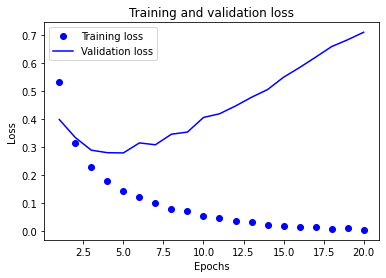

In [41]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 21)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

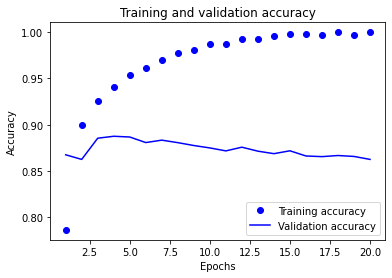

In [42]:
#plotting the training and validation accuracy
val_accu = history_dict['val_acc']
train_accu = history_dict['acc']
plt.plot(epochs, train_accu, 'bo',label='Training accuracy')
plt.plot(epochs, val_accu, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
#retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 108us/step - loss: 0.4428 - accuracy: 0.8258
Epoch 2/4
25000/25000 [==============================] - 2s 100us/step - loss: 0.2591 - accuracy: 0.9092
Epoch 3/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.2017 - accuracy: 0.9281
Epoch 4/4
25000/25000 [==============================] - 2s 75us/step


In [44]:
results

[0.3274723095989227, 0.8700399994850159]

In [45]:
#using already trained model to predict something
model.predict(x_test)

array([[0.17315209],
       [0.9998774 ],
       [0.5467615 ],
       ...,
       [0.06221196],
       [0.04938841],
       [0.37555355]], dtype=float32)